In [235]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf


In [236]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [237]:
df = df.dropna()

In [238]:
le_Suburb = LabelEncoder()
le_Type = LabelEncoder()

df['Suburb_n'] = le_Suburb.fit_transform(df['Suburb'])
df['Type_n'] = le_Type.fit_transform(df['Type'])

df = df.drop(['Suburb', 'Type'], axis=1)

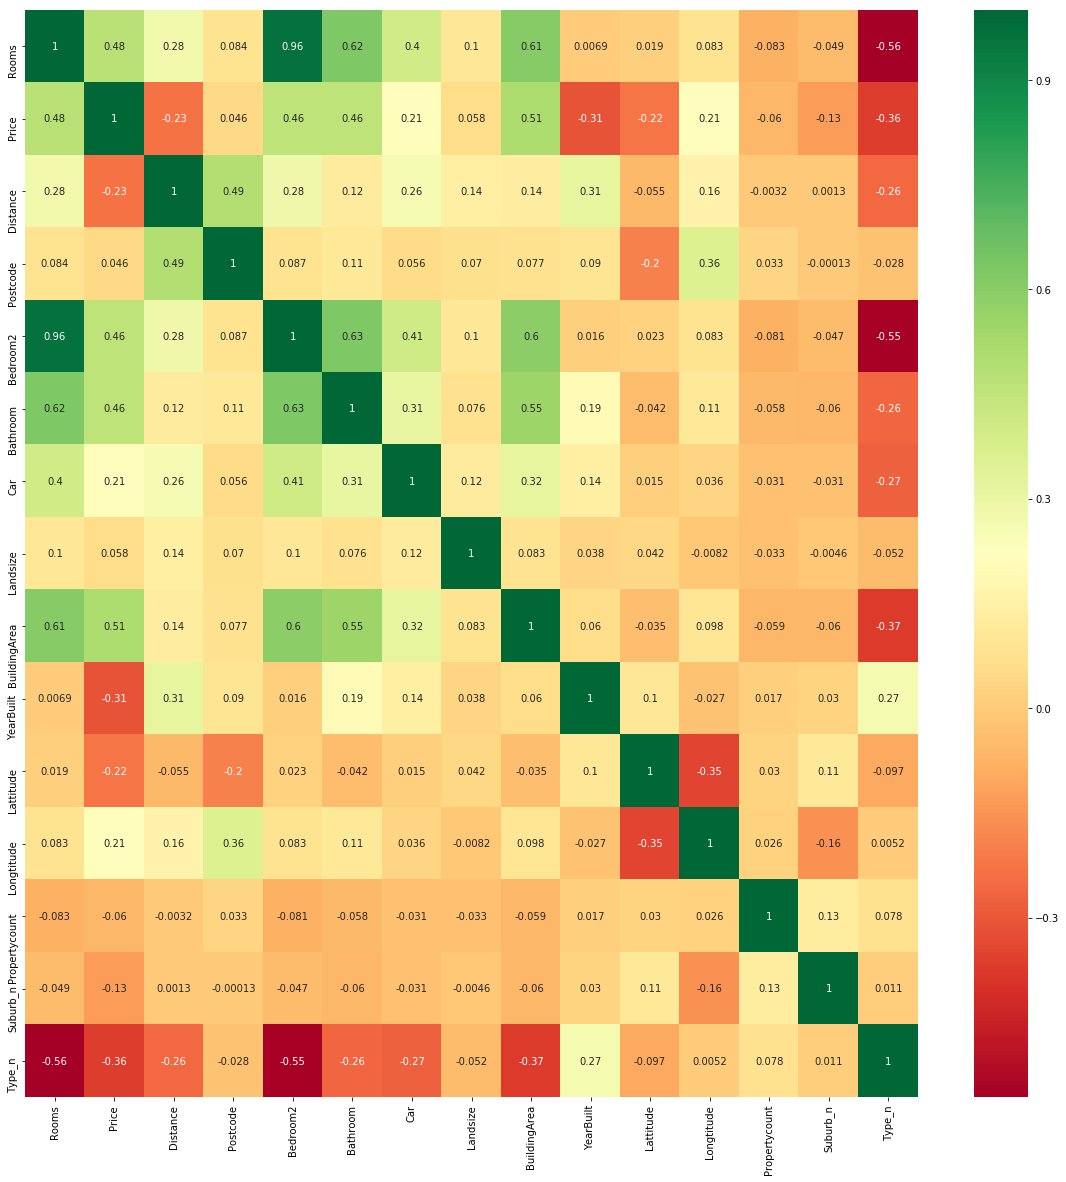

In [239]:
X = df.drop(['Price'], axis = 1)  #independent columns
Y = df['Price']    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [240]:
Features = X
Price = Y
Features.head()

,Address,Rooms,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_n,Type_n
2,25 Bloomburg St,2,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0,0
4,5 Charles St,3,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0,0
6,55a Park St,4,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,0,0
11,124 Yarra St,3,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,0,0
14,98 Charles St,2,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,0,0


In [241]:
Features = Features.drop(['Address', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Lattitude', 'Longtitude',
                          'Regionname', 'Propertycount'], axis=1)


In [242]:
Features.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Suburb_n,Type_n
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,0,0
4,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,0,0
6,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,0,0
11,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,0,0
14,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,0,0


In [243]:
X = Features
Y = Price

In [244]:
# Minimum price of the data
minimum_price = np.amin(Price)

# Maximum price of the data
maximum_price = np.amax(Price)

# Mean price of the data
mean_price = np.mean(Price)

# Median price of the data
median_price = np.median(Price)

# Standard deviation of prices of the data
std_price = np.std(Price)

# Show the calculated statistics
print("Statistics for Melbourne housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Melbourne housing dataset:

Minimum price: $131000.0
Maximum price: $9000000.0
Mean price: $1092901.6288961405
Median price $900000.0
Standard deviation of prices: $679343.67968175


In [245]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.24013158e+05 -4.28204810e+04  1.25069777e+03 -4.64859793e+03
  2.10619867e+05  5.50873915e+04  2.54814969e+01  1.95783540e+03
 -4.23788376e+03 -6.01356087e+02 -1.19490592e+05]

Intercept: 
 5040683.989265684

R-squared:
0.572388446465151


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02557197 0.11349364 0.09750437 0.0286882  0.03492653 0.06860387
 0.17435923 0.19264922 0.15622919 0.10080642 0.00716737]


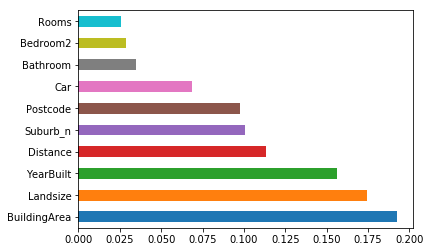

In [246]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y)

# display the relative importance of each attribute
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [247]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
6       Landsize  2.551614e+06
7   BuildingArea  2.400308e+05
9       Suburb_n  1.032957e+05
1       Distance  9.741912e+03
2       Postcode  7.072786e+03
10        Type_n  5.097326e+03
8      YearBuilt  2.030808e+03
5            Car  1.264903e+03
0          Rooms  1.186511e+03
3       Bedroom2  1.157504e+03


In [248]:
new_features = Features.drop(['Bathroom', 'Bedroom2', 'Car', 'Type_n', 'Distance', 'Postcode', 'Suburb_n'], axis=1)
X = new_features

In [249]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [250]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, Y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, Y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [251]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [252]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


Parameter 'max_depth' is 5 for the optimal model.


X.describe()

In [314]:
## Produce a matrix for client data
client_data = [[3, 600, 200, 2000], # Client 1
               [3, 600, 300, 2000], # Client 2
               [4, 600, 500, 2000], # Client 4
               [6, 5000, 800, 1900]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $1,003,981.99
Predicted selling price for Client 2's home: $1,964,110.88
Predicted selling price for Client 3's home: $2,445,615.38
Predicted selling price for Client 4's home: $5,064,200.00


In [315]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.74672766e+05  9.46954232e+00  2.90522277e+03 -6.20813436e+03]

Intercept: 
 12316533.193353701

R-squared:
0.4154878855322992


,Landsize,BuildingArea,YearBuilt
count,8887.000000,8887.000000,8887.000000
mean,523.480365,149.309477,1965.753348
std,1061.324228,87.925580,37.040876
min,0.000000,0.000000,1196.000000
25%,212.000000,100.000000,1945.000000
50%,478.000000,132.000000,1970.000000
75%,652.000000,180.000000,2000.000000
max,42800.000000,3112.000000,2019.000000
